In [19]:
import os
import struct
import itertools
import numpy as np
import matplotlib.pyplot as pyplot
from sklearn.metrics import classification_report
from sklearn import svm, metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold

"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise Exception("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
pyplot.show()

def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix', 
                          cmap=pyplot.cm.Blues):
#     ***
#     This function prints and plots the confusion matrix.
#     Normalizaton can be applied by setting 'normalize=True'.
#     ***
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    pyplot.imshow(cm, interpolation = 'nearest', cmap = cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment = "center",
                 color="white" if cm[i,j] > thresh else "black")
        
    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')

In [21]:
train = list(read("training", "./data"))
X=[]
for i in range(10000):
    X.append(np.ravel(train[i][1]))
Y=[]
for i in range(10000):
    Y.append(train[i][0])

In [22]:
test = list(read("testing","./data"))
X_test=[]
for i in range(1000):
    X_test.append(np.ravel(test[i][1]))
Y_true=[]
for i in range(1000):
    Y_true.append(np.ravel(test[i][0]))

In [23]:
svc = svm.SVC(C=0.000001, kernel='linear', max_iter = -1)
kfold = StratifiedKFold(n_splits=10)
cvs = cross_val_score(svc, X, Y, cv=kfold)
print(cvs)

[0.92537313 0.93220339 0.93512974 0.95704296 0.93793794 0.93293293
 0.94194194 0.91583166 0.91173521 0.94182548]


In [25]:
AVG = np.mean(cvs)
print(AVG)

0.9331954379906391


Confusion matrix, without normalization
[[ 83   0   0   0   0   1   1   0   0   0]
 [  0 125   1   0   0   0   0   0   0   0]
 [  1   0 105   1   0   0   1   2   4   2]
 [  0   1   0  95   0   8   1   1   0   1]
 [  0   1   1   0 101   0   0   0   0   7]
 [  1   0   0   4   0  78   1   0   2   1]
 [  3   0   2   0   1   0  81   0   0   0]
 [  0   1   3   0   1   0   0  91   1   2]
 [  1   0   1   3   2   2   0   1  79   0]
 [  0   1   0   2   4   0   0   4   0  83]]


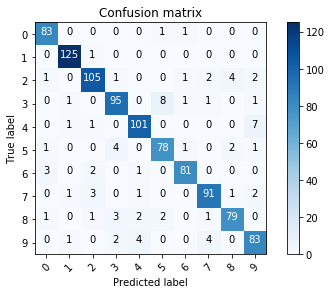

In [25]:
svc = svc.fit(X,Y)
Y_pred = svc.predict(X_test)
cm = metrics.confusion_matrix(Y_true,Y_pred)
plot_confusion_matrix(cm, ["0","1", "2", "3", "4", "5", "6", "7", "8", "9"], 
                      normalize=False)

In [23]:
print(classification_report(Y_true, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        85
           1       0.97      0.99      0.98       126
           2       0.93      0.91      0.92       116
           3       0.90      0.89      0.90       107
           4       0.93      0.92      0.92       110
           5       0.88      0.90      0.89        87
           6       0.95      0.93      0.94        87
           7       0.92      0.92      0.92        99
           8       0.92      0.89      0.90        89
           9       0.86      0.88      0.87        94

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [24]:
metrics.f1_score(Y_true,Y_pred,average='micro')

0.9209999999999999